# Examen Machine Learning 
### HOGENT - Toegepaste Informatica
### 14 juni 2022
<mark>
Het examen is open boek. Je mag dus alles gebruiken, maar op geen enkele manier communiceren met anderen (binnen en buiten het lokaal). 
Alles wat je nodig hebt, staat in de cursus. Je mag ook het boek gebruiken of digitaal op je laptop raadplegen. Het internet staat open, maar je hebt zeker geen tijd  om lang te zoeken in de cursus of om het internet af te schuimen. 
Gebruik de oplossingsmethoden die gezien zijn in de cursus en geen alternatieven die je ergens van het internet hebt geplukt. 
</mark>  

**Beantwoord elke vraag in de cel die er onmiddellijk onder staat**. 

Totaal: 120 punten

## Vraag 1 - Datavoorbereiding (4 pt)

1.1. Leg uit in welke gevallen je, in de fase van de datavoorbereiding, gebruik maakt van _ordinal encoding_ en wanneer van _one hot encoding_. Leg hierbij beide begrippen duidelijk uit. 

Beide encodingstechnieken gaan we gebruiken in de data preparation fase.

* We maken gebruik van ordinal encoding wanneer we klassen of variabelen hebben die een orde verwachten. Bijvoorbeeld als we de leeftijdsklassen willen bijhouden willen we ervoor zorgen dat iedere waarde van een andere orde is. Bijvoorbeeld eerst een baby gevolgd door een tiener, daarna een volwassene, etc.

* One Hot Encoding gebruiken we om voor iedere unieke waarde van een variabele een extra kolom te voorzien. Zo kunnen wij bijvoorbeeld voor de datumklasse voor ieder uur een extra kolom maken. Voor een variabele die het land aangeeft gaan we dan kolommen maken voor ieder land zoals Maand_België, Maand_Frankrijk, etc.

1.2. Wat is het voordeel van gebruikt te maken van een Pipeline die zowel de datavoorbereiding als de training bevat? 

* Een pipeline zorgt ervoor dat we verschillende transformers, scalers, classifiers en/of regressors sequentieel kunnen uitvoeren. Op deze manier hebben we in onze code ook een overzicht van welke acties het model uitvoert op de data.

## Vraag 2 - Classifiers en regressors (10 pt)

2.1. Welk uniek voordeel hebben decision trees t.o.v. alle andere algoritmen die we gezien hebben? 

* Decision trees werken sneller en efficiënter. Een model met een decision tree vereist minder datavoorbereiding. Bij een decision tree hebben wij geen feature scaling nodig. 

2.2. Welk probleem ontstaat als je het CART Training algoritme voor decision trees zijn gang laat gaan? Leg uit. 

* We kunnen enkel werken met binaire bomen. Bij een regressiemodel kunnen wij zo enkel achterhalen of een waarde groter of kleiner is. Er zijn maar twee opties mogelijk.
Daarnaast kunnen we ook overfitting hebben als we een te hoge samples_leaf hebben.

2.3. Bespreek (minstens) twee categoriën van oplossingen om dit probleem tegen te gaan. 

* We kunnen de minimum_samples_leaf verkleinen om overfitting tegen te gaan. 

2.4. Leg uit: de computationele complexiteit van het CART training algorithm is $O(n \times m log_2(m))$

* Dit duidt aan op een relatief snelle uitvoering van het model. De $(m log_2(m))$ duidt aan op de binaire structuur van de boom. Bij iedere diepte gaan we het aantal mogelijkheden in twee opsplitsen. De n verwijst naar het aantal nodes dat de boom bevat.

2.5. In de cursus kwamen heel wat classifiers en regressors aan bod. Hieronder staan 5 omschrijvingen. **Geef telkens de juiste naam van de (groep van) classifiers of regressors**.  

2.5.1. Er wordt een model gecreëerd op basis van de training data. Daarna wordt er een model gecreëerd dat de fouten van het vorige model probeert te corrigeren. Enz.

* Gradient Boost

2.5.2. Een n-dimensionale ruimte van inputvariabelen wordt opgedeeld in klassen op basis van rechten of (hypervlakken) en grenzen. Het trainen van het algoritme komt neer op het vinden van de best mogelijke coëfficiënten voor het opdelen van de ruimte. De afstand van de grenzen tot de dichtste coördinaten wordt de margin genoemd.

* SVM

2.5.3. Een classifier die op basis van coëfficiënten vermenigvuldigd met de inputvariabelen (een lineaire combinatie van de inputvariabelen dus), de kans berekent dat een bepaalde input tot de ene klasse, dan wel tot de andere klasse behoort

* SVC

2.5.4. Een iteratief algoritme dat gebruikt wordt om een (lokaal) minimum of maximum te vinden.

* Softmax regressie

## Vraag 3 - NLP en neurale netwerken (32 pt)

Bekijk de oplossing van de oefening Email Classisification met NN (notebook https://colab.research.google.com/github/jdecorte/machinelearning/blob/main/solutions/133-exercise_email_classification_solution.ipynb). Beantwoord de volgende 16 vragen. 

3.1. Bekijk de implementatie van de functie `remove_stopwords_nl`. Eigenlijk is de naam van de functie een beetje ongelukkig gekozen.  Wat doet deze functie allemaal? Beschrijf met je eigen woorden (geen Python!) en wees volledig. Leg hierbij o.a. uit waarom stemming of lemmatization belangrijke stappen zijn bij de datavoorbereiding van documenten voor machine learning. 


* Als parameters geven wij een string mee. Dit is een lange tekst of zin van woorden. Allereerst gaan wij word_tokenize gebruiken om de volledige tekst te gaan opdelen per woord. We gaan de tekst naar lowercase gaan omzetten. Met stemming gaan we ieder woord gaan doorlopen en kijken of deze in de lijst van stopwoorden terug te vinden is. Met de separator gaan we alle woorden weer samenvoegen tot één zin. Deze zin zal geen stopwoorden meer bevatten. Tussen ieder woord zal er een spatie zijn.

* Het verschil tussen stemming en lemmatization is dat we bij stemming de stam van een woord gaan achterhalen. Lemmatization gaat het woord omzetten naar de basisvorm. Deze hebben wij nodig om extra rekening te houden met de mogelijke stopwoorden. Vervoegingen kunnen een anomalie vormen bij het terugvinden van de stopwoorden in een string.


3.2. Met behulp van de onderstaande code worden de categorieën vervangen door de cijfers 0 .. 3
```python
dict_map = {'NEWS': 0, 'ADS': 1, 'JOB': 2, 'ICT': 3}
data['Category'] = data['Category'].map(dict_map)
```
Waarom wordt dit gedaan? Zouden we dit ook mogen vervangen door de cijfers 1 .. 4?

* We moeten classificeren op basis van numerieke waarden. We kunnen geen gebruik maken van tekstobjecten zoals 'News' of 'Ads'. Alle rijen met 'News' zullen de Categorie-waarde 0 krijgen, alle rijen met ADS zullen categorie 1 krijgen, enz. We mogen dit niet veranderen naar 1 tot en met 4. De waarden moeten beginnen met 0.

3.3. In de onderstaande code wordt de lengte van de tekst in de kolom Text bepaald.
```python
data['numberOfWords'] = data.Text.str.split().apply(len)
```
Leg in je eigen woorden uit waarom het belangrijk is dat we de lengte van de tekst kennen.

* Op basis van de lengte kunnen we meer info opvragen over de gehele dataset. Zo kunnen we weten wat de outliers zijn, bijvoorbeeld teksten die een aantal woorden hebben die groter is dan Q3, en wat de gemiddelde lengte van een tekst is. Op basis van de lengte kunnen we ook de parameters achterhalen voor een eventuele vectorizer afhankelijk van de toepassing.

3.4.  Gegegeven de volgende code
```python
vectorizer = TextVectorization(max_tokens=60000, output_sequence_length=2500)
```
Wat is de betekenis van `max_tokens = 60000`?

Wat is de betekenis van `output_sequence_length=2500`? Moet dit exact 2500 zijn? Mag dit ook een andere waarde zijn?

* De max_tokens duidt aan hoe groot onze vector of vocabulary zal zijn. Als we niets meegeven zal er geen grens zijn.

* output_sequence_length duidt aan hoe groot de dimensie moet zijn van de shape. Deze waarde mogen we kiezen. Als de waarde te groot is wordt de rest opgevuld, als de waarde te klein is wordt de rest afgesneden.

3.5. Gegeven de volgende code en output

```python
# Vectorize a small sentence "morgen ontvangt u een nieuw bericht"

output = vectorizer([["morgen ontvangt u een nieuw bericht"]])
output.numpy()[0, :20]

array([22567,   391,   181,     1,   135,   320,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0], dtype=int64)# 
```
- Wat is de betekenis van 181?
- Wat is de betekenis van 1?
- Wat is de betekenis van 0?

181 staat hier voor 'u'. 1 staat hier voor 'een'. Dit zijn de indexen uit de dictionary die we hebben opgehaald. Ze geven aan waar de woorden, bijvoorbeeld 'u' zich bevinden in de array. De nullen stellen padding voor. We hebben gekozen voor een output array van twintig woorden. Er worden maar vijf woorden gebruikt dus wordt de rest als padding gezien.

3.6. Wat is de bedoeling van `embeddings_index[word] = coefs`?

* We vragen van een bepaald woord de verschillende karakters op. Ieder karakter ('a', 'b', spatie, etc) wordt bijgehouden in een lijst. We krijgen hier een lijst met de indexwaarden van de karakters terug.

3.7. Wat is de lengte van `embeddings_index['fiets']`. Leg kort uit waarom.

* Vijf. Voor iedere letter wordt er een index teruggegeven. Dus één index voor ieder karakter.

3.8. Het aantal hits = 14873 en het aantal misses = 45127. 
Leg in je eigen woorden uit wat de bedoeling is van hits en misses.
Is het noodzakelijk dat je dit berekent voor het verder verloop van de code?

* Hits wilt zeggen dat een woord overeenkomt met het bewaarde woord in de lijst. Een miss wilt zeggen dat dit niet overeenkomt.

* De nauwkeurigheid van het model zal lijden afhankelijk van het aantal hits en misses. 

3.9. Wat is de bedoeling van de layer Flatten in het neuraal netwerk?

* In de voorafgaande poolingsfase wordt er een map aangemaakt. Deze mapping gaan we omzetten naar een eendimensionale vector. Met andere woorden gaan we van een soortgelijke grid-vorm naar een 1D lijst.

3.10. Hoeveel neuronen telt elke Dense layer?

* Om het aantal neuronen te bepalen moeten we kijken naar de voorafgaande lagen. Het aantal neuronen zal verminderen richting de outputlayer toe. Het hoogst aantal neuronen zal altijd liggen tussen de grootte van de inputlaag (grootste aantal) en de grootte van de outputlaag (kleinste aantal).

3.11. Leg de betekenis uit van
```python
keras.layers.Dropout(rate=0.25)
```
Waarom doen we dit? 

* Bij een drop-out gaan we een neuroon, inclusief de inputneuronen, tijdelijk uit het model gaan plaatsen. Tijdens de trainingsstap wordt de neuroon genegeerd, maar de volgende stap kan deze weer ingezet worden.

3.12. Stel dat je de architectuur van het netwerk uittekent, hoeveel hidden layers telt dit neuraal netwerk dan?

* Ik zou hier kiezen voor hoogstens vijf hidden layers.

3.13. Hadden we in plaats van `activation='softmax'` ook `activation='sigmoid'` kunnen gebruiken? Leg kort uit waarom of waarom niet.

* Sigmoïde kunnen we enkel gebruiken als binaire classifier. Softmax laat ons toe om meerdere klassen te gaan voorspellen.

3.14. Onderaan staan er 2 grafieken die specifiek zijn voor Neurale Netwerken. Wat is de correcte benaming van deze curven?

* Dit zijn twee activatiefuncties.

3.15. Verklaar de benaming en leg uit waar en hoe deze curven gebruikt worden. Verklaar hierbij ook de vier termen: Epochs, Accuracy, Train, Validation. 

* Het aantal epochs is het aantal keer dat een dataset wordt doorlopen. Hoe groter het aantal epochs, hoe langer het programma zal moeten draaien.

3.16. Leg uit waarom je bij het opbouwen van de lagen van een neuraal netwerk voor de outputlaag bij een regressieprobleem, in tegenstelling tot bij een classificatieprobleem, doorgaans geen activatiefunctie gebruikt.

## Vraag 4 - Project Musti (8 pt)
4.1. Meer dan 5000 foto's met een resolutie van 640 x 350 is behoorlijk veel. Wat heb je gedaan om de hoeveelheid data te reduceren zonder noemenswaardig verlies aan informatie? 

* Wij hebben voor de foto's gebruik gemaakt van subsampling. Op deze manier was onze input een stuk kleiner zonder dat we belangrijke data verloren.

4.2. Welk algoritme heb je gekozen om het model op te stellen? 

* Wij hebben meerdere algoritmes gebruikt. Uiteindelijk hebben wij, voor aanvang van de presentatie, voor een CNN gekozen. Dit omdat CNN een net betere nauwkeurigheidsgraad had vergeleken met de random forest regressor. Enkel hadden wij per ongeluk onze afmetingen omgewisseld. Na deze aanpassing was het verschil tussen de twee modellen zeer duidelijk. Met CNN houden wij ook rekening met mogelijke verschuivingen van de camera.

4.3. Wat heb je gedaan om het optimale algoritme en de optimale parametercombinatie te vinden? 

* Wij hebben eerst een GridSearch ontworpen om te achterhalen welk model we best gebruiken. Hier stonden we extra stil bij de RandomForestClassifier om de juiste parameters terug te vinden. Bij het convolutionele netwerk hebben wij zowel een eigen structuur opgesteld alsook gewerkt met de LeNet-5 structuur. Hier merkten we dat LeNet ons niet echt hielp en we zijn bij ons model gebleven.

   4.4. Zou je, nu je (hopelijk) de cursus volledig gestudeerd hebt, nog steeds voor het zelfde algoritme kiezen? Waarom wel of waarom niet? 

* Persoonlijk blijf ik bij de keuze van het CNN. Achteraf had ik tijdens de voorbereiding op mijn examen nog geprobeerd om enkele lagen toe te voegen, maar het resultaat had geen zichtbare verbeteringen. Voor deze case is het aanpakken van de verschuivingen iets wat ik persoonlijk belangrijk vindt. Een mogelijke verschuiving van de camera kan het model ondermijnen. Andere modellen houden hier weinig tot geen rekening mee.

## Vraag 5 - Oefening (66 pt)

Deze onderstaande dataset bevat data van cardiotocogrammen die gemaakt werden bij prenatale echo's. Door 3 experten werd een classificatie gedaan, zowel met betrekking tot het morfologisch patroon (CLASS) als met betrekking tot de toestand van de foetus (NSP). Dus zowel de kolom CLASS als de kolom NSP bevatten een 'score' die de 3 experten aan de data gaven.  
Daarom kan deze dataset gebruikt worden voor een 10-class of voor een 3-class classificatie.  


* LB - FHR-basislijn (slagen per minuut)    
* AC - aantal versnellingen per seconde  
* FM - aantal foetale bewegingen per seconde  
* UC - aantal baarmoedersamentrekkingen per seconde  
* DL - aantal lichtvertragingen per seconde  
* DS - aantal ernstige vertragingen per seconde  
* DP - aantal langdurige vertragingen per seconde  
* ASTV - percentage van de tijd met abnormale kortetermijnvariabiliteit  
* MSTV - gemiddelde waarde van kortetermijnvariabiliteit  
* ALTV - percentage van de tijd met abnormale langetermijnvariabiliteit  
* MLTV - gemiddelde waarde van langetermijnvariabiliteit  
* Width - breedte van FHR-histogram  
* Min - minimum van FHR-histogram  
* Max - Maximum van FHR-histogram  
* Nmax - aantal histogrampieken  
* Nzeros - aantal histogramnullen  
* Mode - histogrammodus  
* Mean - histogram gemiddelde  
* Median - histogram mediaan  
* Variance - histogramvariantie  
* Tendency - histogramtendens  
* CLASS - klassecode van de FHR (1 tot 10)
* NSP - klassecode van de toestand van de foetus (1 -> N=normaal; 2 -> S=verdacht (suspect); 3 -> P=pathologisch (= dit wijst op een ziekte))

In [16]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
import seaborn as sns                               # Advanced data visualisation

from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [17]:
if 'google.colab' in str(get_ipython()):
    colab = True
    print ('You are running on Google Colab')
else:
    colab = False
    print ('You are not running on Google Colab')

if colab:
    from google.colab import drive
    drive.mount('/content/gdrive')

You are not running on Google Colab


In [18]:
if colab:
    df = pd.read_csv('/content/gdrive/MyDrive/DataEchos.csv', delimiter=";")
else:
    df = pd.read_csv('DataEchos.csv', delimiter=";")
df.head()


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,9,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,6,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,6,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,6,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,2,1.0


5.1. Geef algemene informatie over de  dataset (type van elke kolom, null waarden, ...)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   float64
 12  Min       2126 non-null   float64
 13  Max       2126 non-null   float64
 14  Nmax      2126 non-null   float64
 15  Nzeros    2126 non-null   float64
 16  Mode      2126 non-null   float64
 17  Mean      2126 non-null   float64
 18  Median    2126 non-null   float64
 19  Variance  2126 non-null   float64
 20  Tendency  2126 non-null   floa

5.2. Is dit een scheve (skewed) dataset? Geef het aantal records voor NSP = 1, 2 en 3.

Er zijn overdreven veel waarden van klasse 1 vergeleken met 2 en 3. Eventueel kunnen we deze klasse op willekeurige manier gaan reduceren tot 300-400.

In [20]:
df[(df['NSP'] == 3) | (df['NSP'] == 1) | (df['NSP'] == 2)]['NSP'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: NSP, dtype: int64

5.3. In eerste instantie willen we de classificatie doen op basis van NSP (en níet CLASS).  
Wat is X? Wat is y?

In [21]:
X = df.drop(['NSP'],axis=1)
y = df['NSP']

5.4. Wat is X_train, y_train, X_test, y_test?

In [22]:
from sklearn.model_selection import train_test_split    
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

5.5. Wat zijn de numerieke kolommen in X?

In [23]:
numerical_ix = X.select_dtypes(include=['int64', 'float64']).columns

5.6. Geef de unieke waarden in NSP **gesorteerd** van klein naar groot.

In [24]:
df['NSP'].sort_values()

5.7. Definieer de ColumnTransformer die toegepast wordt voor het standaardizeren van de waarden in de numerieke kolommen.

In [26]:
col_transform = ColumnTransformer(transformers=[
    ('standard_scaler', StandardScaler(), numerical_ix)
    ])

5.8. Creëer de volgende 4 classifiers.  
Bepaal telkens de optimale waarden voor de parameters gebruik makend van GridSearchCV.  
Geef telkens de gevonden optimale waarden voor de classifier.  
Geef telkens de accuracy.

* Random Forest
* Support Vector Machine
* Multiple Class Logistic Regression
* Decision Tree

In [31]:
# Random Forest
param_grid = { 
    'n_estimators': [100, 200, 400, 600],
    'max_leaf_nodes': [2, 4, 6, 10, 14, 16, 18],
    'max_depth' : [2, 4, 6, 8, 10]
}

grid_svc_rfc = GridSearchCV(RandomForestClassifier(random_state = 42), param_grid, scoring='accuracy', cv=3)

pipeline = Pipeline([
    ('prep',col_transform),
    ('grid_svc', grid_svc_rfc)
])

pipeline.fit(X_train, y_train)

print(f"best estimator = {grid_svc_rfc.best_estimator_}")
print(f"best score = {grid_svc_rfc.best_score_}")

y_pred = pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f'accuracy --> {acc}')

best estimator = RandomForestClassifier(max_depth=10, max_leaf_nodes=18, random_state=42)
best score = 0.9686292001189415
accuracy --> 0.9718045112781954


In [35]:
# SVM
from sklearn.svm import SVR
svr_params = {'epsilon': [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5], "kernel": ["rbf", "poly", "sigmoid", "linear"], "degree": [1, 2, 3]}

grid_svc_svm = GridSearchCV(SVR(), svr_params, scoring='neg_mean_absolute_error', cv=3)
pipeline = Pipeline([('prep',col_transform), ('grid_svc', grid_svc_svm)])
pipeline.fit(X_train, y_train)

# best estimator
print(f"best estimator = {grid_svc_svm.best_estimator_}")
# best score
print(f"best score = {grid_svc_svm.best_score_}")

y_pred = pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f'accuracy --> {acc}')

best estimator = SVR(degree=1)
best score = -0.13731701859966106


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [34]:
# Logistic Regression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

grid_clf_lr = GridSearchCV(LogisticRegression(multi_class="multinomial"), param_grid, scoring='accuracy', cv=3)

pipeline.fit(X_train, y_train)

print(f"best estimator = {grid_clf_lr.best_estimator_}")
print(f"best score = {grid_clf_lr.best_score_}")

y_pred = pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f'accuracy --> {acc}')

accuracy --> 0.9718045112781954


In [32]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'criterion': ["gini", "entropy"],
    'max_depth': [1,2,3,4,5,6,7,8,9],
    'min_samples_split': (0.05,0.1, 0.2, 0.3,0.4),
    'min_samples_leaf': (0.05,0.1,0.2, 0.3,0.4)
}

grid_clf_dc = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid, scoring='accuracy', cv=3)

grid_clf_dc.fit(X_train,y_train)

print(f"best estimator = {grid_clf_dc.best_estimator_}")
print(f"best score = {grid_clf_dc.best_score_}")

y_pred = pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f'accuracy --> {acc}')

best estimator = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=0.05,
                       min_samples_split=0.05, random_state=42)
best score = 0.9654951880643227
accuracy --> 0.9718045112781954


5.9. Bepaal bij de Random Forest Classifier de relatieve belangrijkheid van elk van de features.

In [ ]:
importances = pd.DataFrame({'column_name': X.columns, 'importance': grid_svc_rfc.best_estimator_.feature_importances_})
importances

5.10. De resultaten van de Decision Tree Classifier zijn niet goed.   
Implementeer een manier om deze te verbeteren.

In [60]:
# Ik zou in dit geval de minimumdiepte van de bomen gaan aanpakken. Dit zou ik verminderen tot we een aanvaardbare precisiegraad krijgen.

5.11. Creëer een ensemble dat bestaat uit elk van de voorgaande 4 classifiers mét hun optimale parameters. (Maak gebruik van de 'verbeterde versie' van de Decision Tree Classifier.)  
Het moet mogelijk zijn in verdere stappen om de relatieve probabiliteiten van elk van de 3 klassen op te vragen.   
 
Geef de accuracy en de confusion matrix van het ensemble.

In [62]:
voting_clf = VotingClassifier(
    estimators=[('log_clf', grid_clf_lr.best_estimator_), ('rnd_clf', grid_svc_rfc.best_estimator_), ('svm_clf', grid_svc_svm.best_estimator_), ('dc_clf', grid_clf_dc.best_estimator_)],
    voting='soft')

all_clf = [
  ('log_clf', grid_clf_lr.best_estimator_), ('rnd_clf', grid_svc_rfc.best_estimator_),
  ('svm_clf', grid_svc_svm.best_estimator_), ('dc_clf', grid_clf_dc.best_estimator_), ('vot_clf', voting_clf)
]

for clf_tuple in all_clf:
  pipeline = Pipeline([
    ('prep',col_transform),
    (clf_tuple[0], clf_tuple[1])
])

  pipeline.fit(X_train, y_train)
  y_pred = pipeline.predict(X_test)
  tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
  print(f"{clf_tuple[0]} accuracy_score = {accuracy_score(y_test, y_pred)}  TN = {tn}   FP = {fp}   FN = {fn}   TP = {tp}")

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [37]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(voting_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_test, y_pred)
labels = ['0','1']

cf = sns.heatmap(conf_mx,square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels)
cf.set_xlabel('Predicted class')
cf.set_ylabel('Actual class')

NameError: name 'all_clf' is not defined

5.12. Bekijk de confusion matrix goed. Hoewel de accuracy best ok lijkt, zijn de feitelijke resultaten niet goed. Stel dat we NSP = 2 (Suspect) en 3 (Pathologisch) zonder onderscheid volledig samennemen als zijnde Positief (~ er is iets aan de hand) en NSP = 1 (Normaal) beschouwen als zijnde Negatief (~ er is niets aan de hand).  
Bereken en geef dan de precision op basis van de voorgaande confusion matrix.

5.13. Bereken en geef dan de recall op basis van de voorgaande confusion matrix.

In [ ]:
from sklearn.metrics import precision_score, recall_score
print(f"The precision is: {precision_score(y_train, y_train_pred):.2%}")
print(f"The recall is: {recall_score(y_train, y_train_pred):.2%}")

5.14. Wat is belangrijker in dit geval: precision of recall? Leg kort uit.

* Al zijn beide liefst even belangrijk, hier streven we naar een zo hoog mogelijke recall. We willen zeker zijn dat we zo veel mogelijk juiste voorspelde diagnoses kunnen stellen op basis van alle gegeven diagnoses.

5.15. Wat is een mogelijke verklaring voor deze slechte resultaten?

* Niet genoeg data van elke klasse. We komen op maar 200-tal tot 300-tal waarden per klasse uit met uitzonder klasse 1 die hier bovenuit stijgt. Meer data verzamelen van de andere klassen zou hier de resultaten bevorderen.

5.16. We zijn niet blij met de bekomen resultaten, dus willen we een alternatief proberen.  
De initiële dataset wordt weer ingelezen.

In [64]:
if colab:
    df = pd.read_csv('/content/gdrive/MyDrive/DataEchos.csv', delimiter=";")
else:
    df = pd.read_csv('DataEchos.csv', delimiter=";")
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,9,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,6,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,6,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,6,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,2,1.0


5.17. Maak het volgende overzicht.  
Het valt op dat voor alle CLASS <= 4 => NSP = 1.0.
Dit zou al een waardevolle voorspelling kunnen zijn. Stel dat we erin slagen om de CLASS zeer accuraat te voorspellen, dan kunnen we met quasi zekerheid zeggen dat alle records met CLASS <= 4 automatisch NSP = 1.0 impliceren. Op die manier zouden we automatisch al een groot aantal records als Normaal kunnen classificeren, zonder de tussenkomst van een expert.

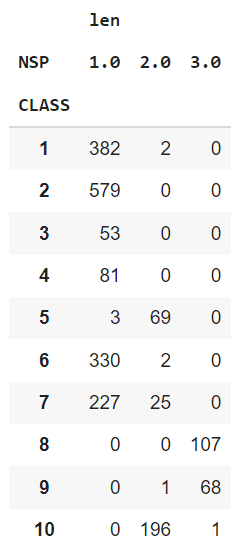

In [70]:
# Schrijf hier de code om bovenstaand overzicht te genereren. 
df.groupby('CLASS')['NSP'].count()

CLASS
1     384
2     579
3      53
4      81
5      72
6     332
7     252
8     107
9      69
10    197
Name: NSP, dtype: int64

We willen nu **CLASS voorspellen** aan de  hand van een **regressiemodel**. 

In [42]:
# We bereiden het regressiemodel voor. 

X = df.drop(['CLASS', 'NSP'], axis = 1)
y_class = df['CLASS']
y_nsp = df['NSP']

from sklearn.model_selection import train_test_split

X_train, X_test, y_class_train, y_class_test, y_nsp_train, y_nsp_test = train_test_split(X, y_class, y_nsp, random_state=42)

5.18. Maak gebruik van regressie om de waarde voor CLASS te proberen voorspellen.  

In [57]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)

param_grid = [
    {'n_estimators': [3, 5, 10, 50]}
  ]

grid_search = GridSearchCV(
    forest_reg, param_grid, cv=3,
    scoring='neg_mean_squared_error',
    return_train_score=True
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'n_estimators': [3, 5, 10, 50]}],
             return_train_score=True, scoring='neg_mean_squared_error')

5.19. Maak gebruik van mean absolute error om een benadering van de fout te vinden.

In [58]:
from sklearn.metrics import mean_absolute_error

final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)

y_predict = pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_predict)
mae

KeyError: "['CLASS'] not in index"

5.20. Bereken en geef het percentage records uit de test set dat een voorspelde waarde voor CLASS <= 4 heeft én toch als label NSP > 1 heeft. 

In [55]:
records = df[(df['CLASS'] <= 4) & (df['NSP'] > 1)]